In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *
import random

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)
random.seed(seed)
trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size,train_identities=True, lr_reasoner=0.00023)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 00/15 | batch 2001/2000 | loss 2.1268 | val loss 0.7716 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 32.26s
train epoch 01/15 | batch 2001/2000 | loss 1.2453 | val loss 0.5873 | acc 0.6629 | f1 0.3801 | prec 0.3125 | recall 0.4850 | roc auc 0.6481 | pr auc 0.4550 | elapsed 89.86s
train epoch 02/15 | batch 2001/2000 | loss 0.8707 | val loss 0.5212 | acc 0.7284 | f1 0.4876 | prec 0.4078 | recall 0.6062 | roc auc 0.7525 | pr auc 0.5642 | elapsed 91.43s
train epoch 03/15 | batch 2001/2000 | loss 0.6520 | val loss 0.4319 | acc 0.8017 | f1 0.5924 | prec 0.5271 | recall 0.6762 | roc auc 0.8298 | pr auc 0.6834 | elapsed 90.09s
train epoch 04/15 | batch 2001/2000 | loss 0.4923 | val loss 0.3809 | acc 0.8383 | f1 0.6574 | prec 0.5994 | recall 0.7279 | roc auc 0.8704 | pr auc 0.7584 | elapsed 88.98s
train epoch 05/15 | batch 2001/2000 | loss 0.3867 |

In [4]:
train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=8, batch_size=batch_size,train_identities=True)

train epoch 0/8 | batch 2001/2000 | loss 0.0800 | val loss 0.3475 | acc 0.8940 | f1 0.7650 | prec 0.7252 | recall 0.8094 | roc auc 0.9375 | pr auc 0.8721 | elapsed 60.14s
train epoch 1/8 | batch 2001/2000 | loss 0.0952 | val loss 0.3582 | acc 0.8939 | f1 0.7678 | prec 0.7194 | recall 0.8232 | roc auc 0.9390 | pr auc 0.8750 | elapsed 87.32s
train epoch 2/8 | batch 2001/2000 | loss 0.0799 | val loss 0.3668 | acc 0.8935 | f1 0.7668 | prec 0.7188 | recall 0.8217 | roc auc 0.9389 | pr auc 0.8747 | elapsed 86.73s
train epoch 3/8 | batch 2001/2000 | loss 0.0728 | val loss 0.3767 | acc 0.8931 | f1 0.7670 | prec 0.7163 | recall 0.8255 | roc auc 0.9392 | pr auc 0.8748 | elapsed 87.87s
train epoch 4/8 | batch 2001/2000 | loss 0.0661 | val loss 0.3863 | acc 0.8904 | f1 0.7640 | prec 0.7061 | recall 0.8323 | roc auc 0.9402 | pr auc 0.8770 | elapsed 87.81s
train epoch 5/8 | batch 2001/2000 | loss 0.0604 | val loss 0.3969 | acc 0.8924 | f1 0.7653 | prec 0.7149 | recall 0.8235 | roc auc 0.9390 | pr au

In [10]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    #else:
        #train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.9048 | val loss 1.9048 | acc 0.6567 | f1 0.3991 | prec 0.3221 | recall 0.5244 | roc auc 0.6451 | pr auc 0.3646 | elapsed 15.27s
train epoch 01/10 | batch 1251/1250 | loss 1.6323 | val loss 1.2837 | acc 0.7281 | f1 0.4708 | prec 0.4080 | recall 0.5562 | roc auc 0.7214 | pr auc 0.4763 | elapsed 37.66s
train epoch 02/10 | batch 1251/1250 | loss 1.1039 | val loss 0.8532 | acc 0.7907 | f1 0.5550 | prec 0.5161 | recall 0.6003 | roc auc 0.7964 | pr auc 0.6003 | elapsed 40.02s
train epoch 03/10 | batch 1251/1250 | loss 0.7461 | val loss 0.5766 | acc 0.8439 | f1 0.6497 | prec 0.6344 | recall 0.6657 | roc auc 0.8594 | pr auc 0.7132 | elapsed 39.95s
train epoch 04/10 | batch 1251/1250 | loss 0.5175 | val loss 0.4032 | acc 0.8830 | f1 0.7294 | prec 0.7332 | recall 0.7257 | roc auc 0.9052 | pr auc 0.8024 | elapsed 41.85s
train epoch 05/10 | batch 1251/1250 | loss 0.3734 | val loss 0.2944 | acc 0.9101 | f1 0.7884 | prec 0.8074 | recall 0.

In [11]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    #_, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240709T002928


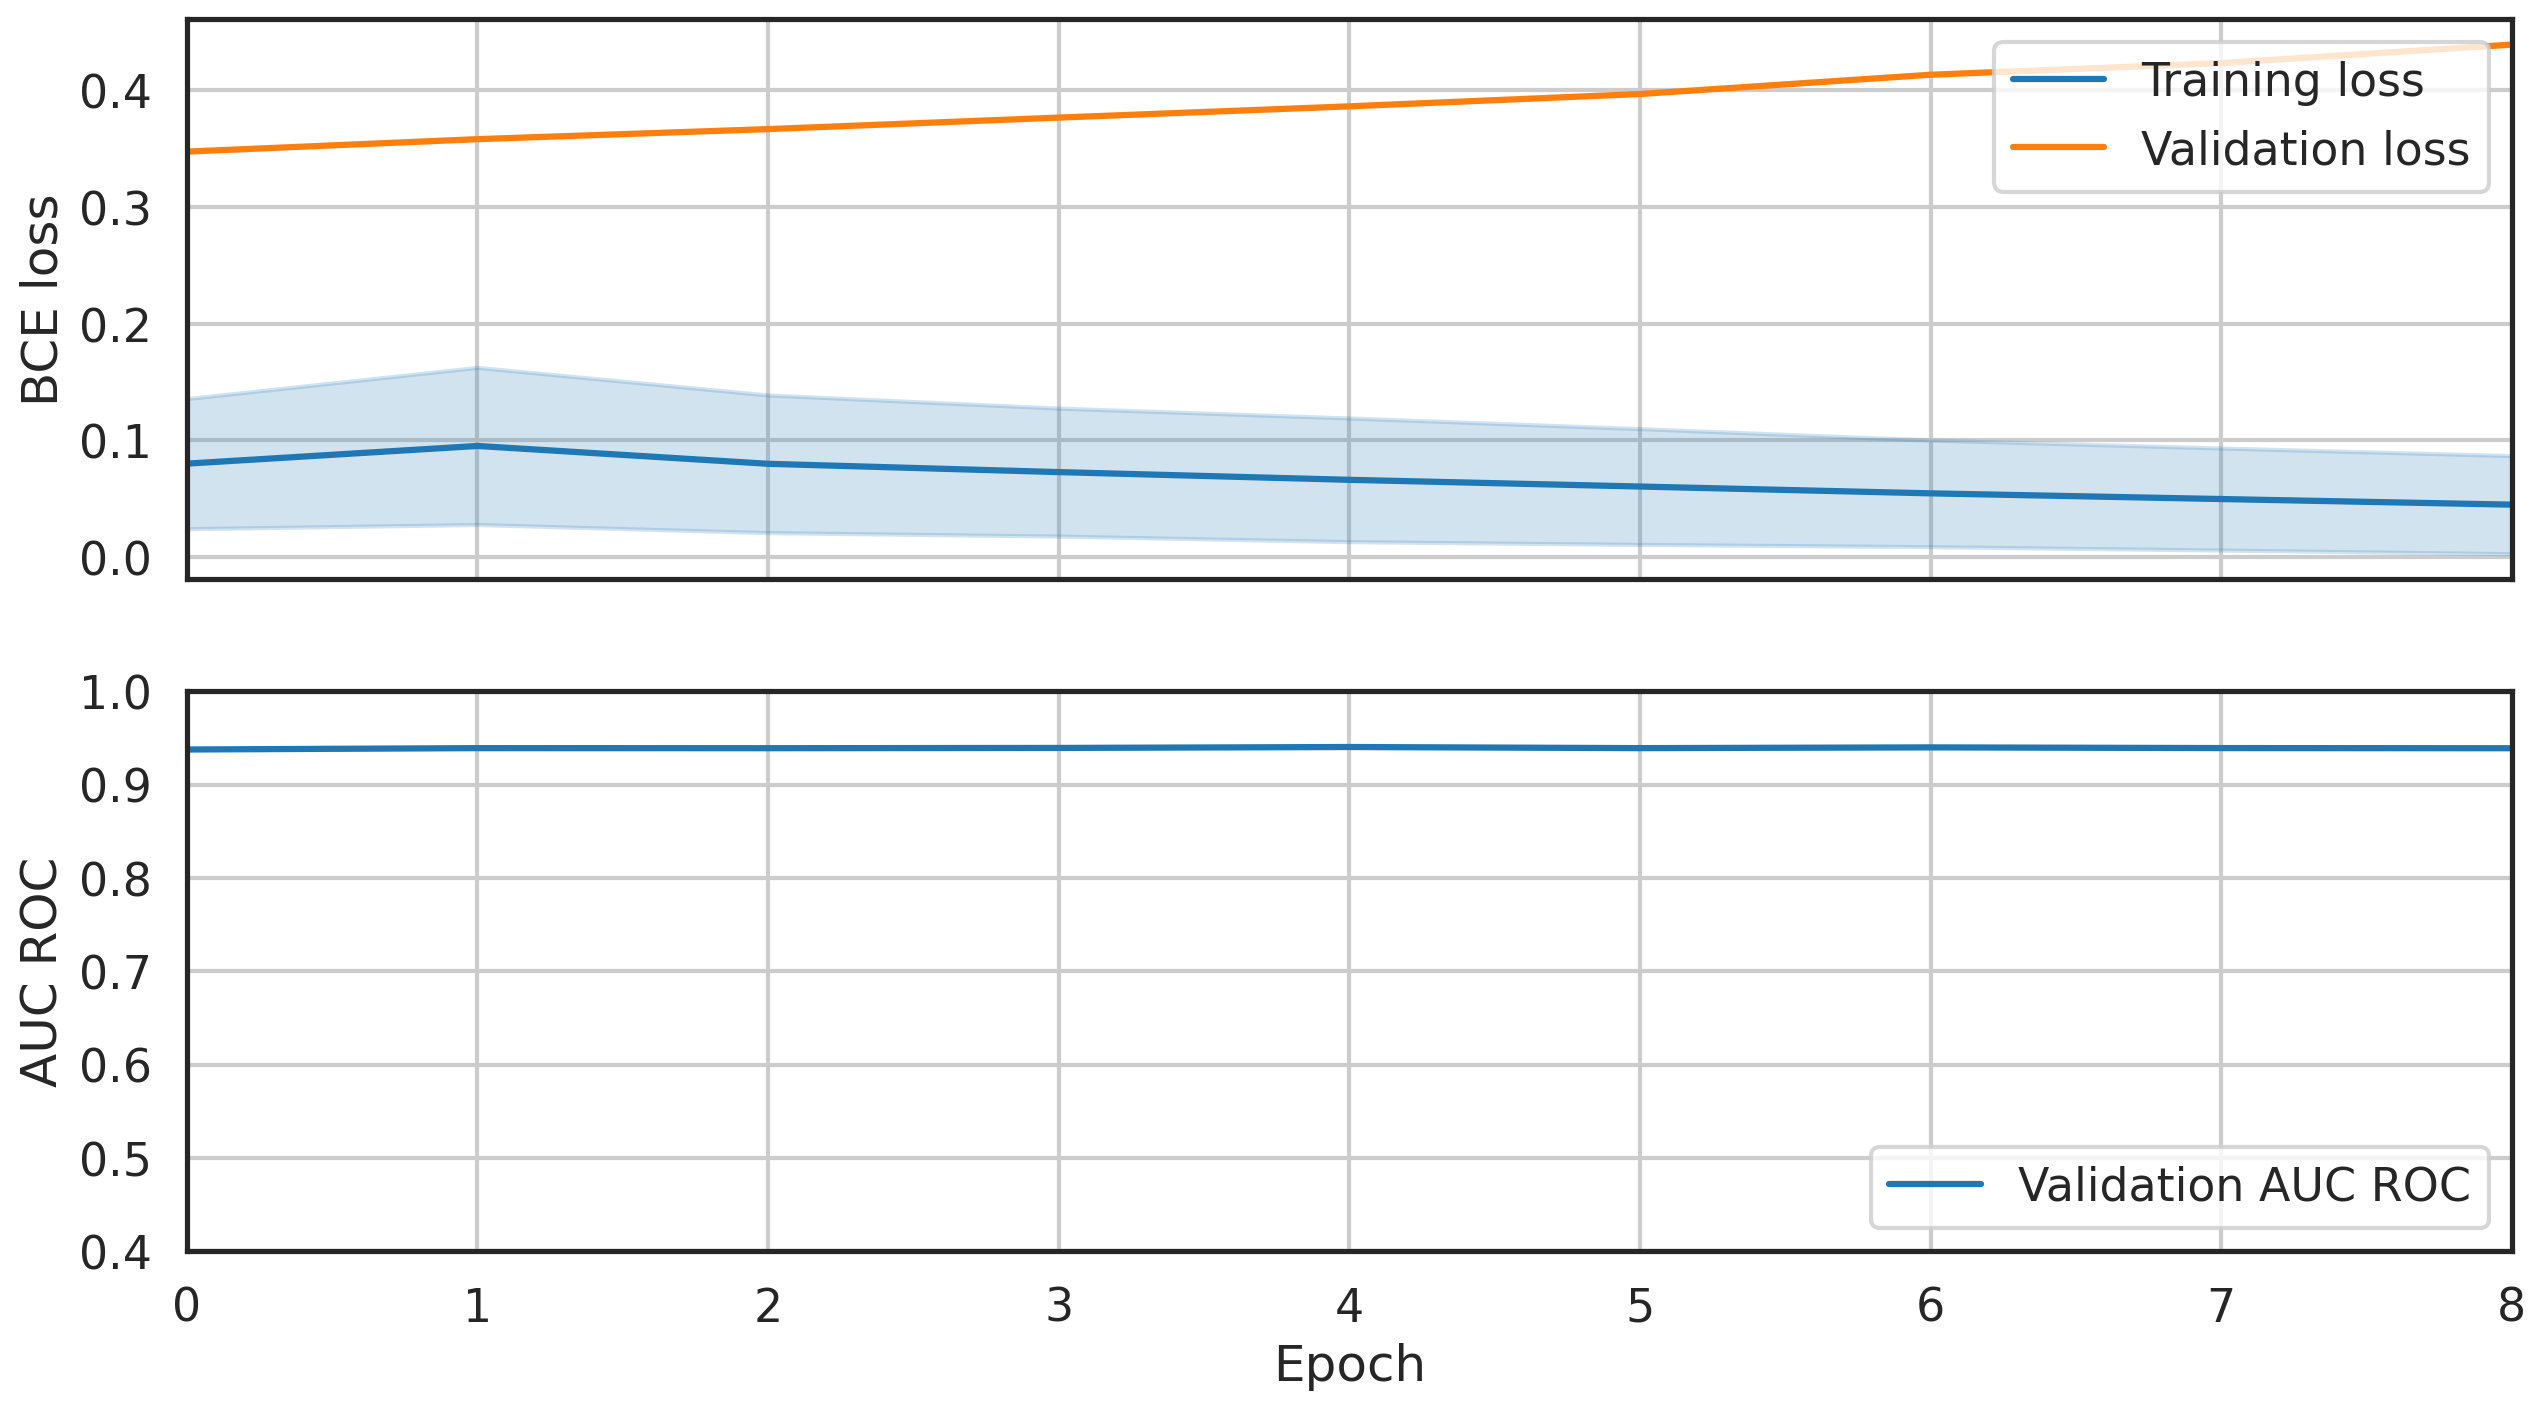

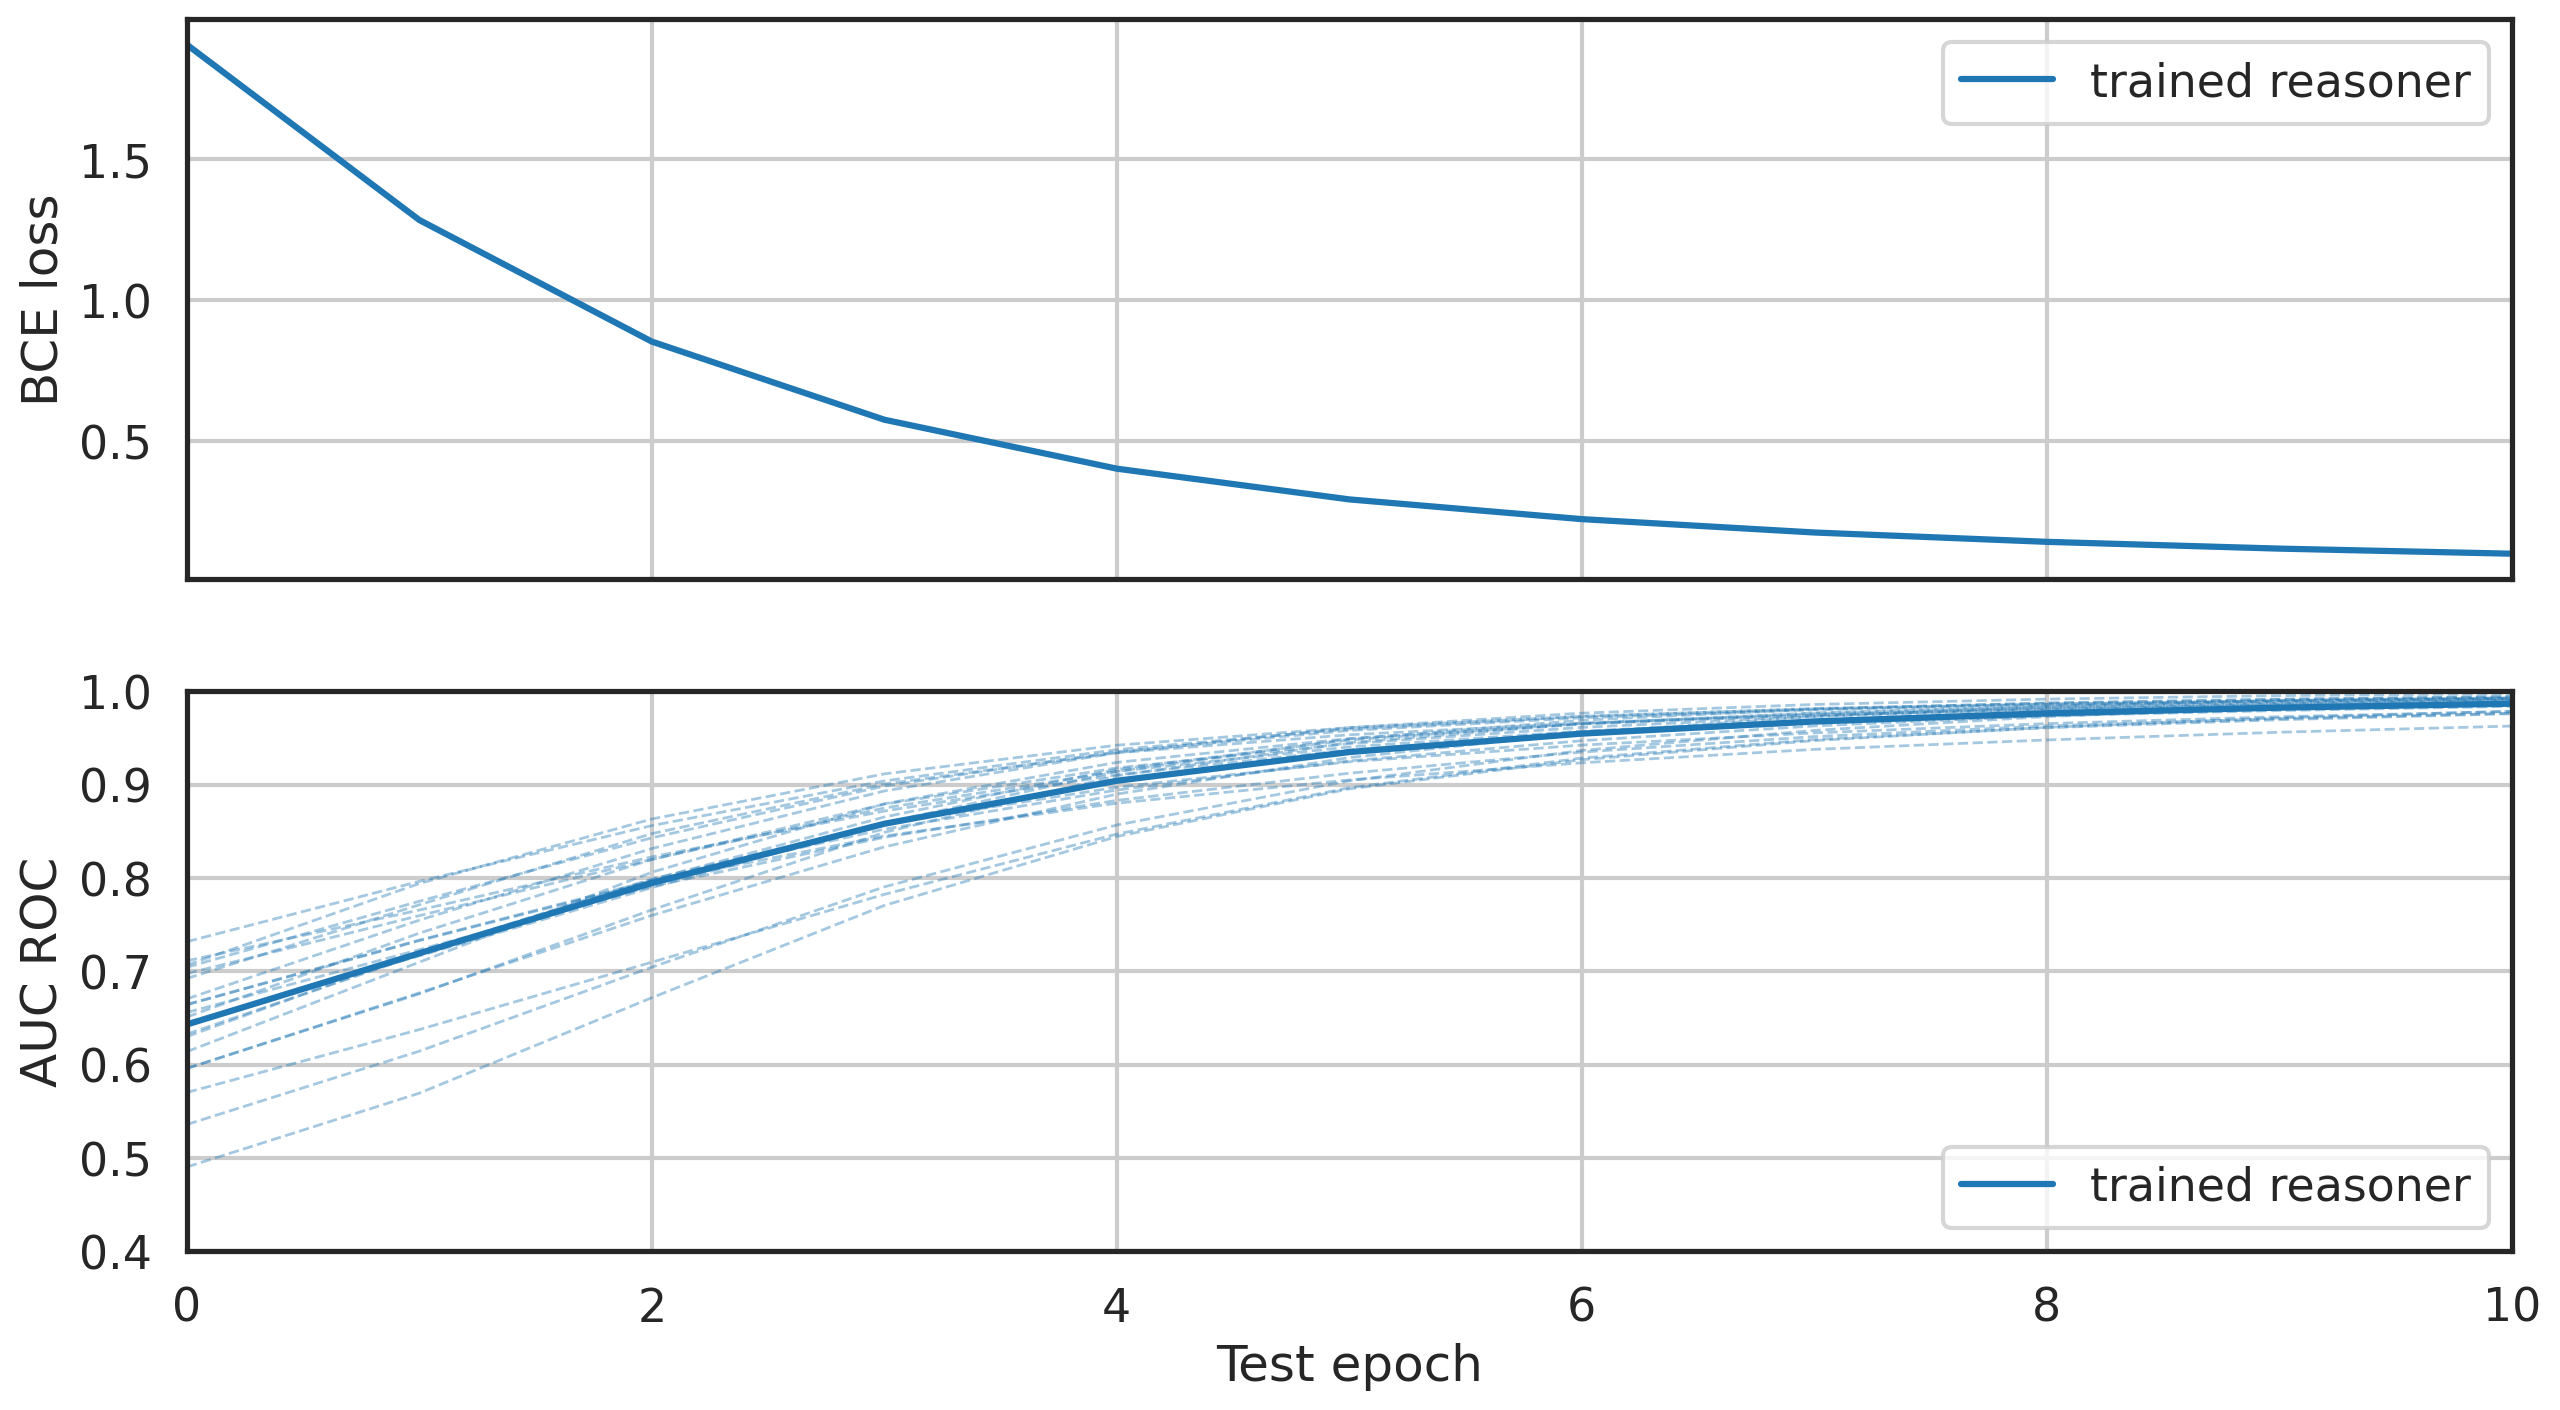

             mean       std     micro
acc      0.966000  0.014599  0.966000
prec     0.943075  0.028818  0.943316
recall   0.897162  0.037129  0.897539
f1       0.919481  0.032625  0.919859
auc_roc  0.986572  0.008417  0.987304
auc_pr   0.969463  0.017035  0.971143


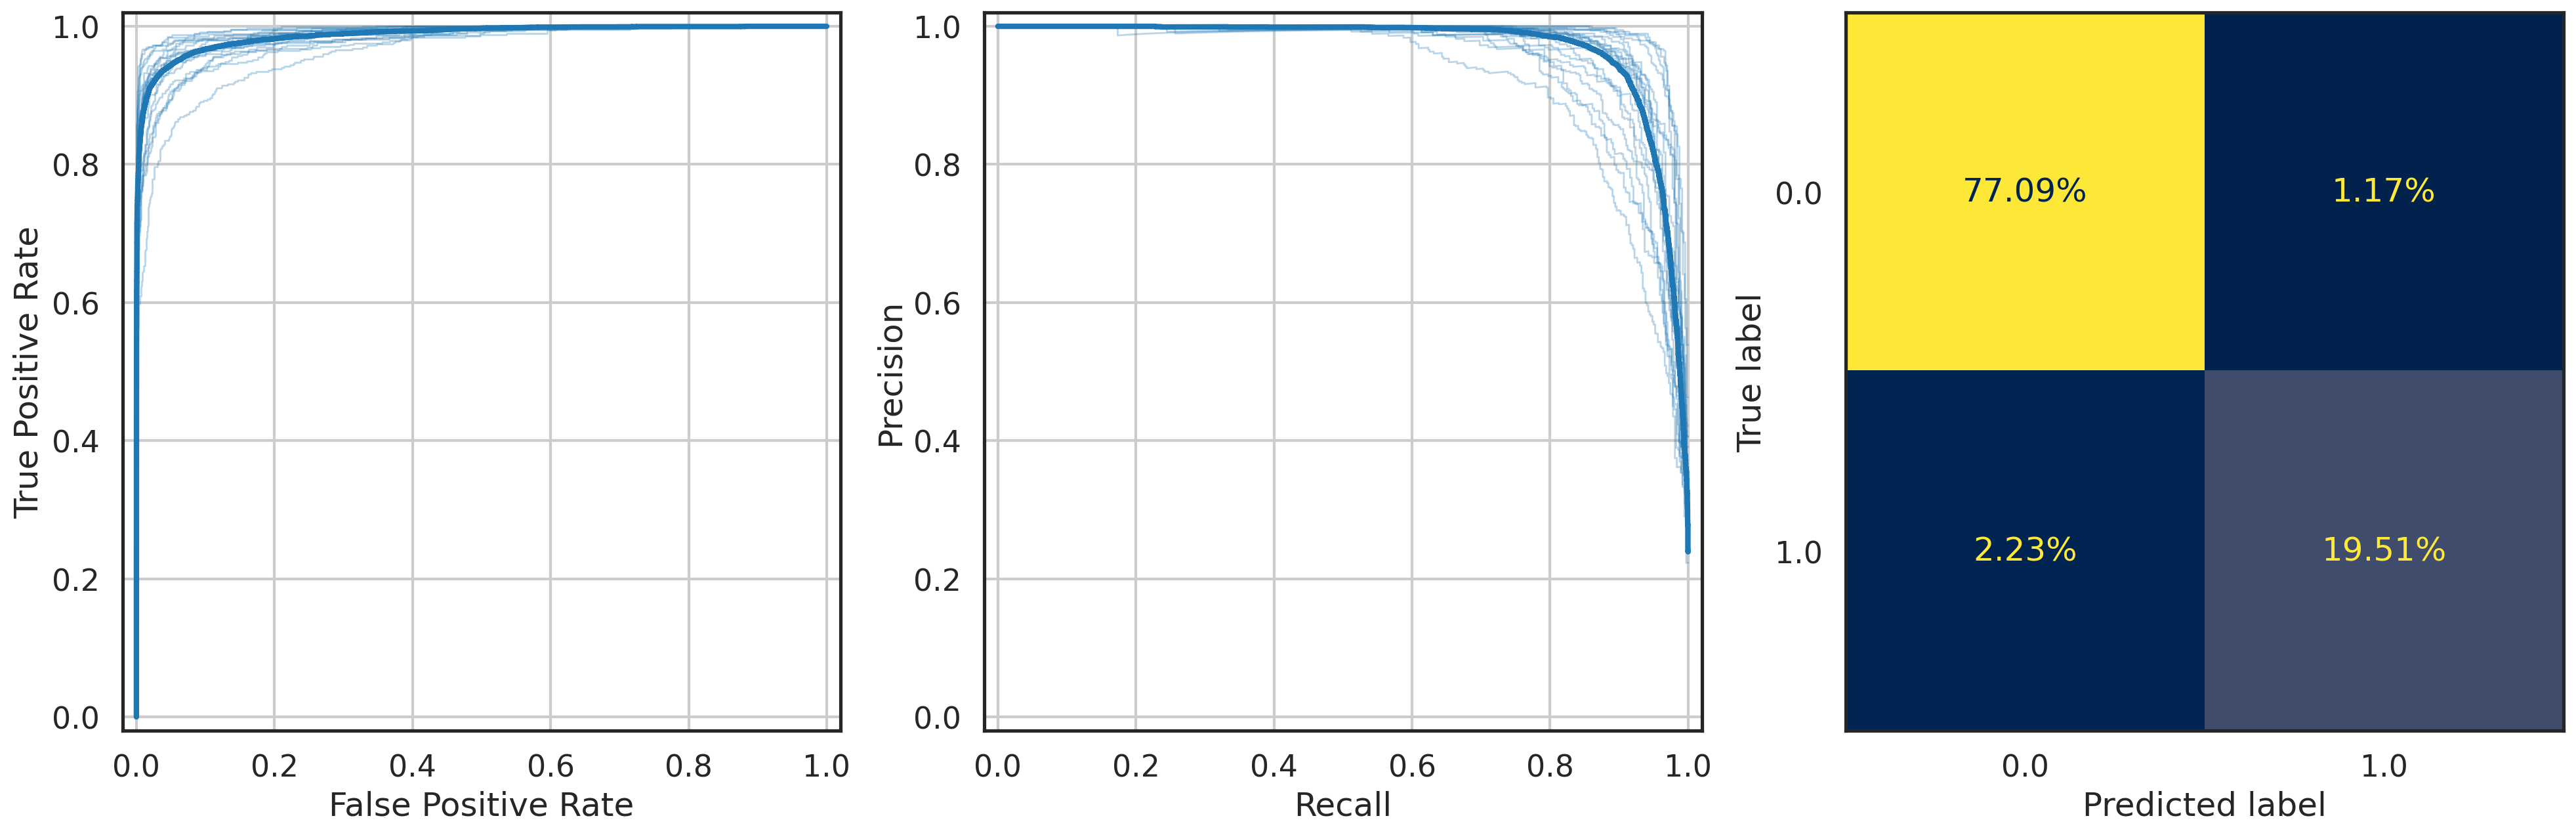

In [12]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good))#, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
#print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))

In [59]:
T.set_printoptions(precision=4)

In [60]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input, trained_reasoner.and_nn(im_mod(input, input)))

tensor([ 0.0591,  0.0252, -0.2554, -0.2013, -0.0570, -0.1957, -0.0743,  0.0700,
        -0.1957, -0.0166], grad_fn=<SelectBackward0>)
tensor([ 0.0809,  0.0944, -0.0213, -0.1300,  0.0774, -0.1213, -0.0457,  0.0327,
        -0.1332, -0.0313], grad_fn=<AddBackward0>)


tensor(0.0095, grad_fn=<MseLossBackward0>)

In [61]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(trained_reasoner.bot_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)), trained_reasoner.bot_concept[0]))

tensor([ 0.1308,  0.1107,  0.1605, -0.1703,  0.1904, -0.0925, -0.0443, -0.0046,
        -0.0609, -0.0692], grad_fn=<SelectBackward0>)
tensor([ 0.1309,  0.1169,  0.1526, -0.1551,  0.1855, -0.1117, -0.0560,  0.0212,
        -0.0768, -0.0747], grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)


In [62]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(input)
print(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)), input))


tensor([-0.2299, -0.1087, -0.0396,  0.2099, -0.2279,  0.0998,  0.2317,  0.0418,
        -0.2303,  0.0569], grad_fn=<SelectBackward0>)
tensor([-0.1937, -0.1276, -0.0416,  0.2162, -0.1786,  0.1091,  0.2227,  0.0259,
        -0.1873,  0.1104], grad_fn=<AddBackward0>)
tensor(0.0009, grad_fn=<MseLossBackward0>)


In [63]:
encoder = encoders[int(np.round(random.random() * (len(encoders ) - 1) , 0))]
input = encoder.concepts[ int(np.round( random.random() * encoder.n_concepts , 0) - 1) ]

print(trained_reasoner.bot_concept[0])
output = trained_reasoner.and_nn(im_mod(trained_reasoner.not_nn(input), input))
print(output)
print(F.mse_loss(output, input))


tensor([ 0.1308,  0.1107,  0.1605, -0.1703,  0.1904, -0.0925, -0.0443, -0.0046,
        -0.0609, -0.0692], grad_fn=<SelectBackward0>)
tensor([ 0.1762,  0.1608,  0.1849, -0.2071,  0.2319, -0.0721, -0.0226,  0.0189,
        -0.0952, -0.1143], grad_fn=<AddBackward0>)
tensor(2.9788e-05, grad_fn=<MseLossBackward0>)


In [64]:
print(trained_reasoner.bot_concept[0])
output = trained_reasoner.not_nn(trained_reasoner.top_concept[0])
print(output)
print(F.mse_loss(trained_reasoner.bot_concept[0], output))

tensor([ 0.1308,  0.1107,  0.1605, -0.1703,  0.1904, -0.0925, -0.0443, -0.0046,
        -0.0609, -0.0692], grad_fn=<SelectBackward0>)
tensor([ 0.1522,  0.1244,  0.1764, -0.1996,  0.2120, -0.1008, -0.0435, -0.0019,
        -0.0666, -0.0842], grad_fn=<SqueezeBackward3>)
tensor(0.0003, grad_fn=<MseLossBackward0>)


In [65]:
print(trained_reasoner.top_concept[0])
output = trained_reasoner.not_nn(trained_reasoner.bot_concept[0])
print(output)
print(F.mse_loss(trained_reasoner.top_concept[0], output))

tensor([-0.0747, -0.2556, -0.0417,  0.3690,  0.0719,  0.1380,  0.4019,  0.1705,
        -0.1606,  0.2787], grad_fn=<SelectBackward0>)
tensor([-0.0610, -0.2314, -0.0300,  0.3291,  0.0654,  0.1216,  0.3530,  0.1528,
        -0.1380,  0.2495], grad_fn=<SqueezeBackward3>)
tensor(0.0007, grad_fn=<MseLossBackward0>)


In [68]:
encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input1 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input2 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

encoder = encoders[int(np.round(random. random() * (len(encoders) - 1), 0))]
input3 = encoder.concepts[int(np.round(random. random() * encoder.n_concepts, 0) - 1)]

print(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))))
print(trained_reasoner.and_nn(im_mod(trained_reasoner.and_nn(im_mod(input1, input2)), input3)))


F.mse_loss(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.and_nn(im_mod(input2, input3)))), trained_reasoner.and_nn(im_mod(trained_reasoner.and_nn(im_mod(input1, input2)), input3)))

tensor([ 0.1102,  0.1248,  0.1810, -0.1667,  0.1723, -0.0922, -0.0429, -0.0390,
        -0.0777, -0.0550], grad_fn=<AddBackward0>)
tensor([ 0.1258,  0.1276,  0.1645, -0.1668,  0.2227, -0.0742, -0.0617, -0.0304,
        -0.1015, -0.1021], grad_fn=<AddBackward0>)


tensor(0.0007, grad_fn=<MseLossBackward0>)

In [69]:
print(trained_reasoner.and_nn(im_mod(input1, input3)))
print(trained_reasoner.and_nn(im_mod(input3, input1)))

F.mse_loss(trained_reasoner.and_nn(im_mod(input1, input3)), trained_reasoner.and_nn(im_mod(input3, input1)))

tensor([ 0.1146,  0.1392,  0.1750, -0.1569,  0.2119, -0.0753, -0.0669, -0.0522,
        -0.0903, -0.0944], grad_fn=<AddBackward0>)
tensor([ 0.1228,  0.1441,  0.1646, -0.1581,  0.2138, -0.1053, -0.0780, -0.0226,
        -0.1039, -0.0885], grad_fn=<AddBackward0>)


tensor(0.0002, grad_fn=<MseLossBackward0>)

In [70]:
print(input1)
print(trained_reasoner.and_nn(im_mod(input1, trained_reasoner.top_concept[0])))

F.mse_loss(input1, trained_reasoner.and_nn(im_mod(input1, trained_reasoner.top_concept[0])))

tensor([-0.0321, -0.0088,  0.2350, -0.0452, -0.2162, -0.1901, -0.0489, -0.0055,
        -0.1118,  0.2250], grad_fn=<SelectBackward0>)
tensor([-0.0297, -0.0227,  0.2029, -0.0285, -0.1654, -0.1739, -0.0519, -0.0081,
        -0.0898,  0.1814], grad_fn=<AddBackward0>)


tensor(0.0007, grad_fn=<MseLossBackward0>)